# Loss plot

Generate a loss plot from a saved model checkpoint. Requires you to have saved a model trained from scratch.

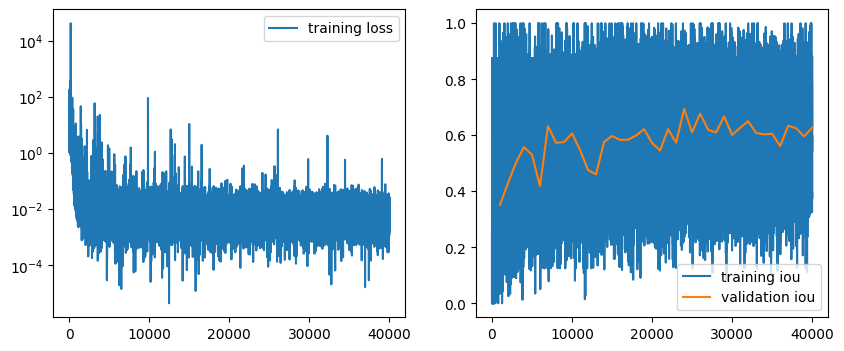

In [3]:
import torch
import matplotlib.pyplot as plt

loaded = torch.load("../saves/default.pt",weights_only=False)

train_steps = []
train_loss = []
train_iou = []
vali_iou = []
vali_steps = []
for k,v in loaded["metrics"]["train"].items():
    train_steps.append(k)
    train_loss.append(v["loss"])
    train_iou.append(v["iou"])
for k,v in loaded["metrics"]["vali"].items():
    vali_steps.append(k)
    vali_iou.append(v["iou"])


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_steps,train_loss,label="training loss")
plt.yscale("log")
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_steps,train_iou,label="training iou")
plt.plot(vali_steps,vali_iou,label="validation iou")
plt.legend()
plt.show()

slice(48, 80, None)


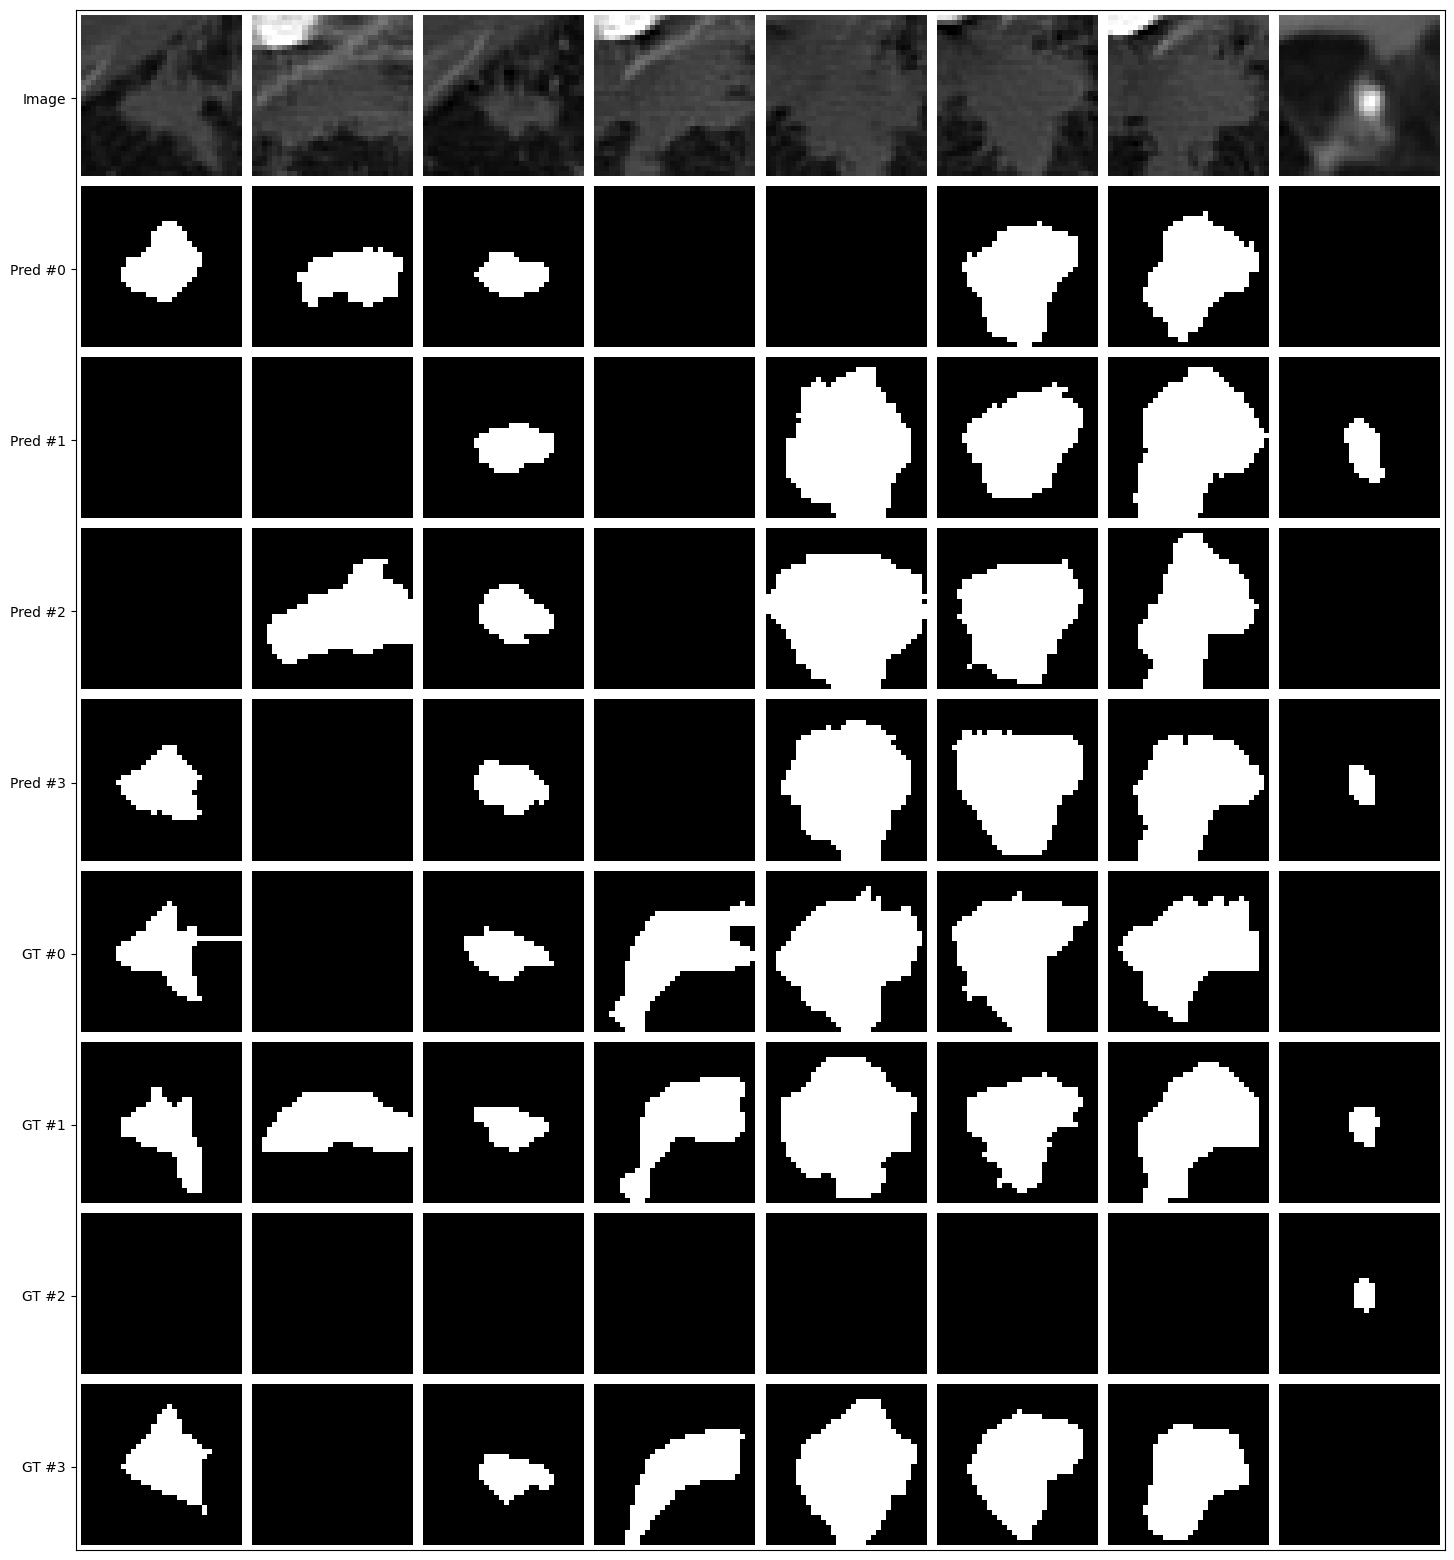

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np

n_show = 8
do_mean = False
zoom_factor = 4
saved_eval_path = "../saves_evaluation/default_eval.pt"

map_inv = lambda x: x*0.229+0.485 # map to invert imagenet normalization for the first channel
loaded = torch.load(saved_eval_path,weights_only=False)
maybe_do_mean = lambda x: [sum(x)/len(x)] if do_mean else x

image = []
for i in range(n_show):
    image.append([map_inv(loaded["images"][i].numpy()[0])])
    image[-1].extend(maybe_do_mean([loaded["preds"][i][:,:,j] for j in range(loaded["preds"][i].shape[2])]))
    image[-1].extend(maybe_do_mean([loaded["gts"][i][:,:,j] for j in range(loaded["gts"][i].shape[2])]))

n_preds = loaded["preds"][i].shape[2]
n_gts = loaded["gts"][i].shape[2]
hw = loaded["images"][i].shape[1]
if zoom_factor > 1:
    zoom_factor = 1/zoom_factor
zoom_idx = slice(int(hw/2-zoom_factor*hw/2),int(hw/2+zoom_factor*hw/2))
print(zoom_idx)
zoom_idx = (zoom_idx,zoom_idx)

image = [[np.pad(item[zoom_idx],((1,1),(1,1)),mode="constant",constant_values=1) for item in image[i]] for i in range(n_show)]
image = [np.concatenate(image[i],axis=0) for i in range(n_show)]
image = np.concatenate(image,axis=1)

plt.figure(figsize=(20,20))
plt.imshow(image,cmap="gray",vmin=0,vmax=1)
if do_mean:
    ticks = ["Image", "Mean Pred", "Mean GT"]
else:
    ticks = ["Image"]+["Pred #"+str(i) for i in range(n_preds)] + ["GT #"+str(i) for i in range(n_gts)]
hw2 = hw*zoom_factor
y = np.arange(len(ticks))* (hw2+2)+hw2//2+1
plt.yticks(y,ticks)
plt.xticks([]);
